# IT Academy - Data Science with Python
## Sprint 8: Hypothesis Testing
### [Github Hypothesis Testing](https://github.com/jesussantana/Hypothesis-testing)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Hypothesis-testing.svg)](https://wakatime.com/badge/github/jesussantana/Hypothesis-testing)

In [1]:
%pip install statsmodels
%pip install researchpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import scipy as sp
import datetime
import warnings
import time
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import researchpy as rp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')
sns.set(rc={'figure.figsize':(15,10)})

In [3]:
np.random.seed(20180701+3)

### Exercise 1: 
  - Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

In [4]:
pd.set_option('display.max_columns', None)

path = '../data/'
file = 'raw/MLB_Stats.csv'

df_raw = pd.read_csv(path+file)

In [5]:
df_raw.head()

,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,Franchise,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,San Francisco Giants,San Francisco Giants,11,0,0,0,0,0,0,0,0,0,0,300000,0,0,0,0,0
1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,Chicago White Sox,Chicago White Sox,25,0,0,0,0,0,0,0,0,0,0,387500,0,0,0,0,0
2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,Boston Red Sox,Boston Red Sox,47,1,0,0,0,0,0,0,0,0,1,403250,0,0,0,0,1
3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,Seattle Mariners,Seattle Mariners,73,0,0,0,0,0,0,0,0,0,0,419000,0,0,0,0,0
4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,New York Yankees,New York Yankees,1,0,0,0,0,0,0,0,0,0,0,500000,0,0,0,0,0


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerID     28293 non-null  object
 1   Player Name  28293 non-null  object
 2   weight       28293 non-null  int64 
 3   height       28293 non-null  int64 
 4   bats         28293 non-null  object
 5   throws       28293 non-null  object
 6   Season       28293 non-null  int64 
 7   League       28293 non-null  object
 8   teamID       28293 non-null  object
 9   Team         28293 non-null  object
 10  Franchise    28293 non-null  object
 11  G            28293 non-null  int64 
 12  AB           28293 non-null  int64 
 13  R            28293 non-null  int64 
 14  H            28293 non-null  int64 
 15  2B           28293 non-null  int64 
 16  3B           28293 non-null  int64 
 17  HR           28293 non-null  int64 
 18  RBI          28293 non-null  int64 
 19  SB           28293 non-nu

In [7]:
df_raw.shape

(28293, 28)

In [8]:
df_raw.describe().round(3)

,weight,height,Season,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
count,28293.000,28293.000,28293.000,28293.000,28293.000,28293.000,28293.000,28293.000,28293.000,28293.000,28293.000,28293.000,28293.000,28293.000,2.829300e+04,28293.000,28293.000,28293.000,28293.000,28293.000
mean,199.049,73.500,2000.938,63.934,161.880,21.787,42.625,8.221,0.909,4.777,20.784,3.108,15.802,30.376,2.112965e+06,1.326,1.451,1.535,1.367,183.360
std,22.654,2.287,8.901,47.285,199.407,30.134,56.201,11.401,1.832,8.384,29.705,7.495,23.036,37.624,3.440239e+06,3.161,2.782,2.748,2.208,226.217
min,140.000,66.000,1985.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.090000e+04,0.000,0.000,0.000,0.000,0.000
25%,185.000,72.000,1994.000,26.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000000e+05,0.000,0.000,0.000,0.000,1.000
50%,195.000,74.000,2001.000,50.000,57.000,4.000,10.000,2.000,0.000,0.000,4.000,0.000,3.000,15.000,6.000000e+05,0.000,0.000,0.000,0.000,66.000
75%,215.000,75.000,2009.000,101.000,298.000,37.000,76.000,14.000,1.000,6.000,34.000,2.000,25.000,50.000,2.425000e+06,1.000,2.000,2.000,2.000,337.000
max,315.000,83.000,2016.000,163.000,716.000,152.000,262.000,59.000,23.000,73.000,165.000,110.000,232.000,223.000,3.300000e+07,120.000,35.000,39.000,17.000,783.000


In [9]:
corr = df_raw.corr()
corr.style.background_gradient(cmap="magma")

,weight,height,Season,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
weight,1.000000,0.539801,0.424305,-0.080874,-0.089453,-0.082409,-0.088201,-0.047991,-0.167602,0.079272,-0.004831,-0.188545,-0.053066,0.019234,0.199390,0.015383,-0.000076,-0.171095,-0.053696,-0.086644
height,0.539801,1.000000,0.053006,-0.226921,-0.247089,-0.224280,-0.238658,-0.207761,-0.239918,-0.053734,-0.146632,-0.244606,-0.183132,-0.148450,0.074569,-0.059576,-0.169205,-0.171330,-0.168878,-0.243096
Season,0.424305,0.053006,1.000000,-0.000024,-0.006963,-0.009216,-0.009511,0.020309,-0.037861,0.026258,-0.005310,-0.054530,-0.024156,0.068342,0.360058,-0.053137,0.078766,-0.069433,-0.029906,-0.009507
G,-0.080874,-0.226921,-0.000024,1.000000,0.925185,0.890184,0.913764,0.877293,0.616526,0.741302,0.863851,0.540927,0.829148,0.838210,0.161444,0.565503,0.615681,0.219020,0.749810,0.925421
AB,-0.089453,-0.247089,-0.006963,0.925185,1.000000,0.964169,0.990083,0.949833,0.667282,0.801458,0.932611,0.594885,0.879662,0.902060,0.208777,0.594423,0.662064,0.254001,0.807163,0.998472
R,-0.082409,-0.224280,-0.009216,0.890184,0.964169,1.000000,0.973927,0.940240,0.676805,0.850300,0.940211,0.635824,0.913207,0.876136,0.227782,0.620724,0.670292,0.198617,0.788262,0.969915
H,-0.088201,-0.238658,-0.009511,0.913764,0.990083,0.973927,1.000000,0.959691,0.673932,0.807341,0.940241,0.603232,0.877870,0.869399,0.215163,0.613838,0.657334,0.222208,0.807441,0.989378
2B,-0.047991,-0.207761,0.020309,0.877293,0.949833,0.940240,0.959691,1.000000,0.608920,0.802907,0.926061,0.527097,0.854106,0.851604,0.218769,0.603397,0.651481,0.169373,0.794655,0.950494
3B,-0.167602,-0.239918,-0.037861,0.616526,0.667282,0.676805,0.673932,0.608920,1.000000,0.418096,0.553260,0.656541,0.550569,0.567397,0.043979,0.327102,0.403740,0.261907,0.486607,0.661730
HR,0.079272,-0.053734,0.026258,0.741302,0.801458,0.850300,0.807341,0.802907,0.418096,1.000000,0.928067,0.345063,0.814773,0.830452,0.275698,0.656352,0.598416,-0.029055,0.705839,0.812508


In [10]:
df_raw.Season.unique()

array([2004, 2007, 2008, 2009, 2012, 2010, 1989, 1986, 1987, 1988, 2006,
       2011, 2014, 2015, 2016, 1998, 1999, 2000, 2001, 1990, 1991, 1992,
       1996, 1993, 1994, 1995, 1997, 2002, 2003, 2005, 2013, 1985])

In [11]:
type(df_raw.Season)

pandas.core.series.Series

## Salary the  21 century

In [12]:
df = df_raw.where(df_raw['Season'] >= 2000)

In [13]:
df.head()

,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,Franchise,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,aardsda01,David Aardsma,215.0,75.0,R,R,2004.0,NL,SFN,San Francisco Giants,San Francisco Giants,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,David Aardsma,215.0,75.0,R,R,2007.0,AL,CHA,Chicago White Sox,Chicago White Sox,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,387500.0,0.0,0.0,0.0,0.0,0.0
2,aardsda01,David Aardsma,215.0,75.0,R,R,2008.0,AL,BOS,Boston Red Sox,Boston Red Sox,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,403250.0,0.0,0.0,0.0,0.0,1.0
3,aardsda01,David Aardsma,215.0,75.0,R,R,2009.0,AL,SEA,Seattle Mariners,Seattle Mariners,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,David Aardsma,215.0,75.0,R,R,2012.0,AL,NYA,New York Yankees,New York Yankees,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# df['Season'] = df['Season'].astype(int)

In [15]:
salary = df.salary
salary.shape

(28293,)

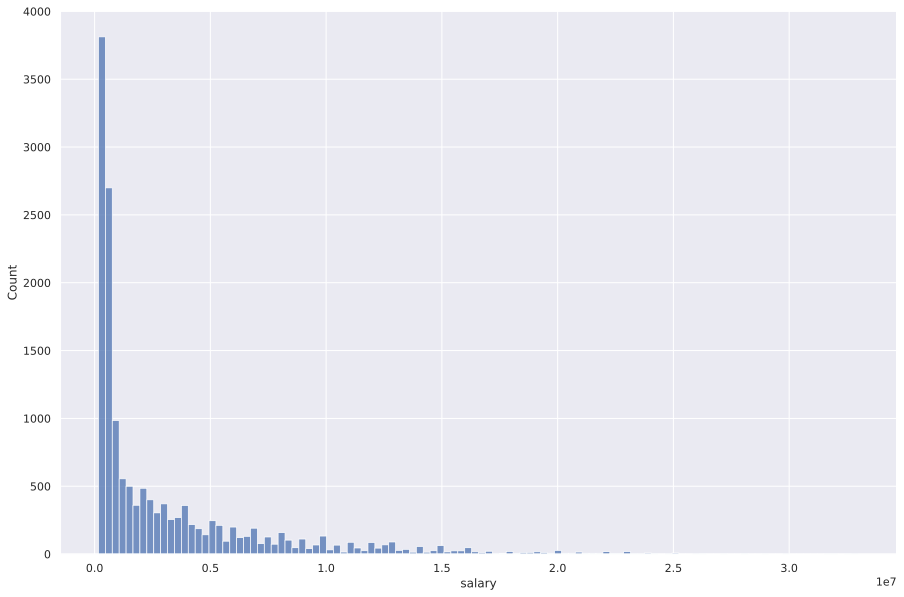

In [16]:
sns.histplot(salary)
mean_population = salary.mean()

- Salary not follow a normal distribution

In [17]:
# Getting mean of the samples

means_salary = []

for i in range(10000):
    # take a sample of 500 values
    salary_samples= salary.sample(n=500, replace=True)
    means_salary.append(salary_samples.mean())

<AxesSubplot:ylabel='Count'>

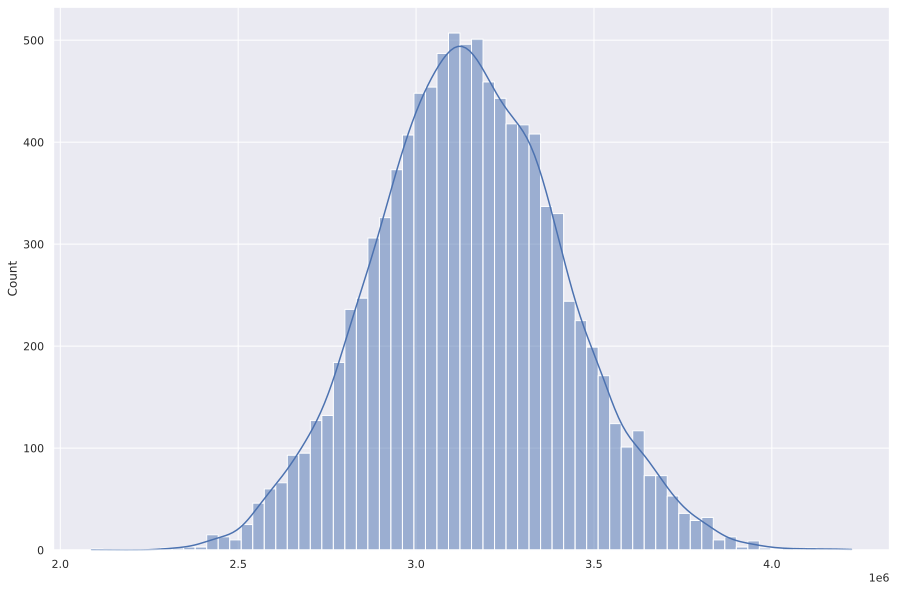

In [18]:
sns.histplot(means_salary,kde=True,line_kws={'color': 'red'})

- mean_salary does follow a normal distribution

In [19]:
print(f'Mean salary population is {round(mean_population,2)}')
print(f'Mean salary of samples mean is {round(np.mean(means_salary),2)}')

Mean salary population is 3150616.16
Mean salary of samples mean is 3149918.72


In [20]:
from scipy.stats import ttest_1samp,ttest_ind
#The test will tell us whether means of the sample and the population are different
#A one sample t-test is used to test whether or not the mean of a population is equal to some value.

res= ttest_1samp(a=means_salary,popmean=mean_population)
print(res)

Ttest_1sampResult(statistic=-0.26582375841924977, pvalue=0.7903804252389379)


In [21]:
alpha = 0.05    
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('reject NULL hypothesis')
else:
    print('cannot reject NULL hypothesis')

P-value is 79.04% and significance level (alpha) is 5% 
cannot reject NULL hypothesis


- since P-value > alpha we cannot rule out the null hypothesis that the population mean is equal to the sample mean
- therefore the null hypothesis is valid: the sample mean is equal to the population mean (we already expected it from the central limit theorem)

### Exercise 2: 
  - Continue with the sports theme dataset you like and select two attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

## Boston vs Dodgers Salary

In [22]:
df.Team.value_counts()

Boston Red Sox                   575
Los Angeles Dodgers              555
New York Yankees                 544
San Diego Padres                 532
Texas Rangers                    524
Colorado Rockies                 520
Pittsburgh Pirates               517
Philadelphia Phillies            516
Arizona Diamondbacks             513
Chicago Cubs                     512
Cleveland Indians                512
New York Mets                    511
San Francisco Giants             508
Kansas City Royals               508
Oakland Athletics                508
St. Louis Cardinals              507
Baltimore Orioles                507
Toronto Blue Jays                503
Atlanta Braves                   501
Cincinnati Reds                  495
Milwaukee Brewers                492
Chicago White Sox                483
Detroit Tigers                   482
Seattle Mariners                 475
Houston Astros                   469
Minnesota Twins                  462
Florida Marlins                  363
W

Median salary for Boston Red Sox: 4460546.88


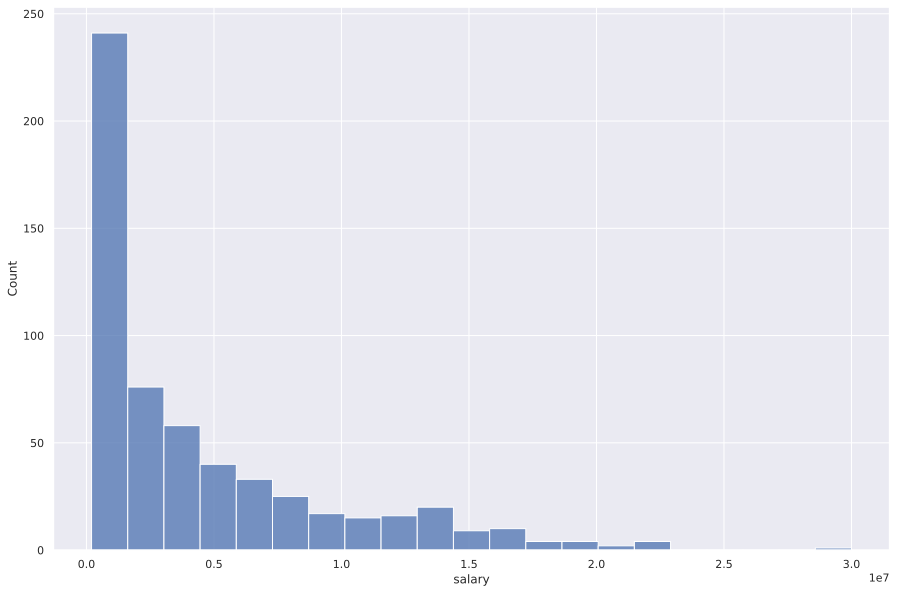

In [23]:
Boston_salary = df[df.Team == 'Boston Red Sox'].salary
sns.histplot(Boston_salary)
print(f'Median salary for Boston Red Sox: %.2f' %Boston_salary.mean())

Median salary for Los Angeles Dodgers  is 4544206.27


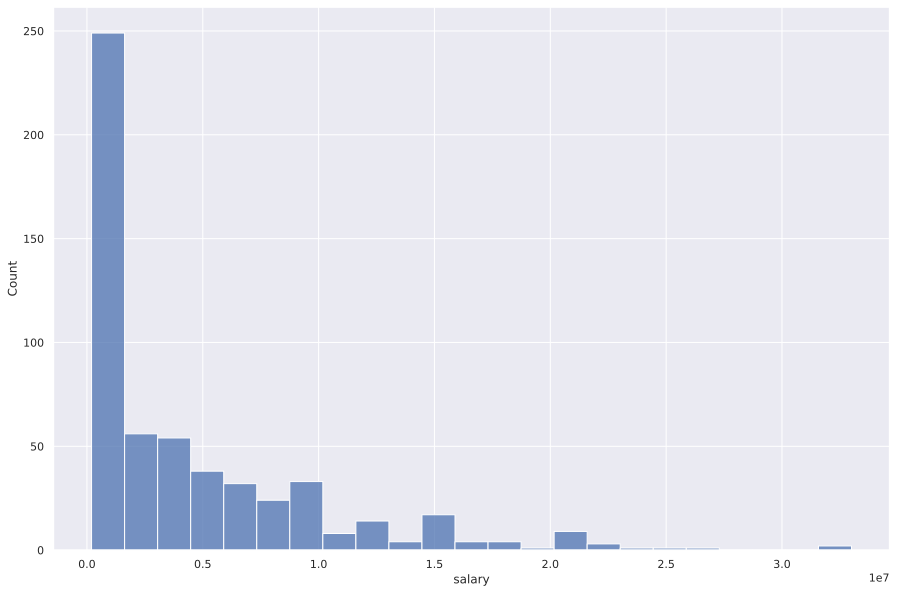

In [24]:
Dodgers_salary = df[df.Team == 'Los Angeles Dodgers'].salary
sns.histplot(Dodgers_salary)
print(f'Median salary for Los Angeles Dodgers  is %.2f' %Dodgers_salary.mean())

In [25]:
res = ttest_ind(a = Boston_salary, b = Dodgers_salary)
print(res)

Ttest_indResult(statistic=-0.26842838616558395, pvalue=0.7884186736058304)


In [26]:
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')

P-value is 78.84% and significance level (alpha) is 5% 


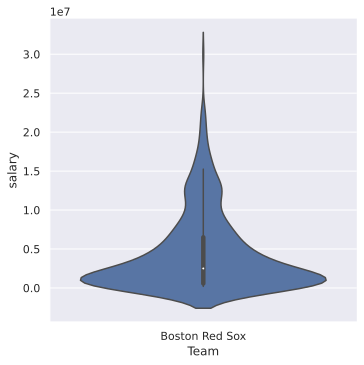

In [27]:
#### Searching outlier in the data

df_Team_Boston = df.where(df.Team == 'Boston Red Sox')
sns.catplot(x = 'Team', y = 'salary', data = df_Team_Boston , kind="violin")

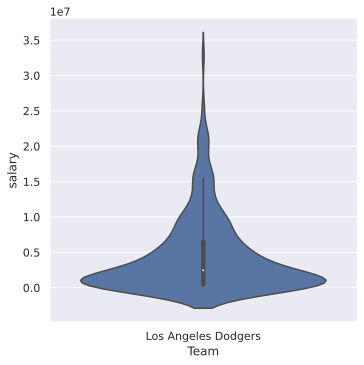

In [28]:
df_Team_Boston = df.where(df.Team == 'Los Angeles Dodgers')
sns.catplot(x = 'Team', y = 'salary', data = df_Team_Boston , kind="violin")

### Hits vs Runs Scored

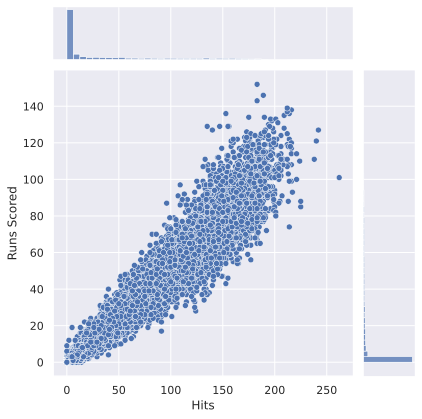

In [29]:
ax = sns.jointplot(df.H, df.R)
ax.set_axis_labels('Hits', 'Runs Scored')
plt.show()

In [30]:
dfReg = df[['H', 'R']]
dfReg.std().round(2)

H    57.25
R    30.65
dtype: float64

In [31]:
dfReg.corr().round(3)

,H,R
H,1.000,0.975
R,0.975,1.000


In [32]:
# select the point (x,y)

dfReg.mean().round(2)

H    43.30
R    22.17
dtype: float64

In [33]:
x = dfReg.H
y = dfReg.R

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("intercept: %f;  slope: %f;  std. error: %f  p-value: %f;  R value: %f; R-square: %f." % 
      (intercept, slope, std_err, p_value, r_value, r_value**2))

intercept: nan;  slope: nan;  std. error: nan  p-value: nan;  R value: nan; R-square: nan.


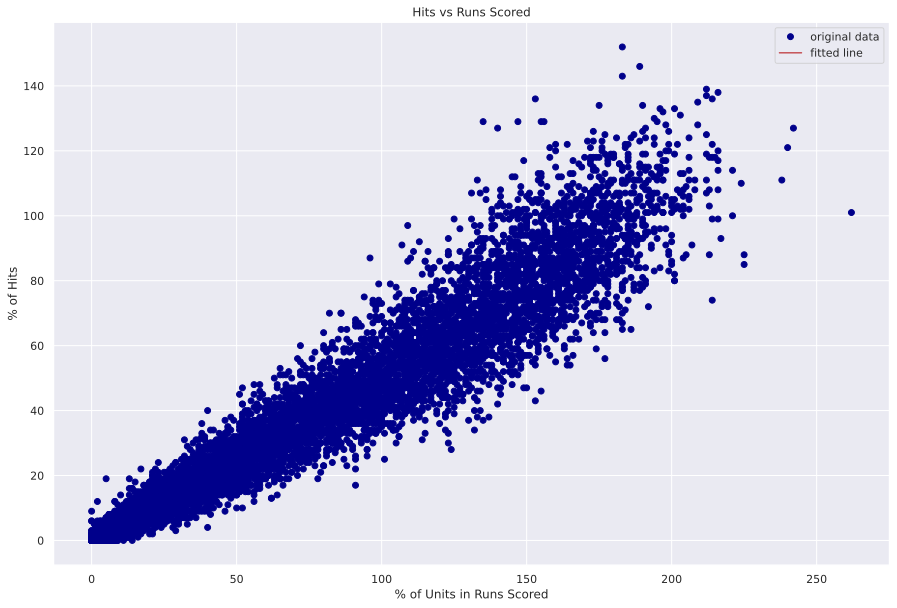

In [34]:
plt.plot(x, y, 'o', label='original data',color='darkblue')
plt.plot(x, intercept + slope * x, 'r', label='fitted line') # equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥
plt.legend()
plt.title('Hits vs Runs Scored')
plt.ylabel('% of Hits')
plt.xlabel('% of Units in Runs Scored')
plt.show()

- Splitting the dataset into Train and Test sets

In [35]:
X = df.H.values.reshape(-1,1)
y = df.R.values.reshape(-1,1)

In [36]:
X

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [nan],
       [nan],
       [ 0.]])

- we split 80% of the data to the training set while 20% of the data to the test set using below code.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22634, 1), (5659, 1), (22634, 1), (5659, 1))

In [ ]:
pearson_coef, p_value = stats.pearsonr(df.H, df.R)

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

- Conclusion:
Since the p-value is < 0.05, the correlation between Hits and Runs Scored is statistically significant, although the linear relationship is extremely strong (~0.973)